# Assignment 3: Iris Classification 🌸

## 📚 Learning Objectives
- Explore and visualize the **Iris dataset**.
- Train a **K-Nearest Neighbors (KNN)** classifier.
- Evaluate model performance and make predictions.

## Part 1: Data Loading and Exploration (20 marks)

### Q1 (5 marks)
Load the Iris dataset using `sklearn.datasets.load_iris()`. Print the feature names, target names, and the shape of the data.

In [41]:
from sklearn.datasets import load_iris # Import dataset / Импорт датасета
import pandas as pd # Data manipulation / Работа с данными
import numpy as np # Numerical operations / Числовые операции
import matplotlib.pyplot as plt # Plotting / Графики
import seaborn as sns # Advanced plotting / Продвинутые графики

# Load dataset
iris = load_iris() # Load data / Загрузить данные
X = iris.data # Features / Признаки
y = iris.target # Target / Целевая переменная

print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("Data Shape:", X.shape)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Data Shape: (150, 4)


### Q2 (5 marks)
**Question:** What type of problem is this (classification or regression)? Why?

**Answer:**
This is a **Classification** problem. 
Why? Because the target variable (species) is **categorical** (Setosa, Versicolor, Virginica), not continuous. We are trying to assign each flower to a specific class or category.

### Q3 (5 marks)
Display the first 5 rows of the data as a pandas DataFrame, using the feature names as column headers.

In [42]:
df = pd.DataFrame(X, columns=iris.feature_names) # Create DataFrame / Создать DataFrame
df['species'] = [iris.target_names[i] for i in y]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Q4 (5 marks)
Report the class distribution (counts for each species).

In [43]:
print(df['species'].value_counts()) # Count instances per class / Подсчет количества для каждого класса


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Part 2: Visualization (20 marks)

### Q5 (10 marks)
Create a pair plot (scatter plot matrix) for the four features using `seaborn` or `matplotlib`. Color the points by species.

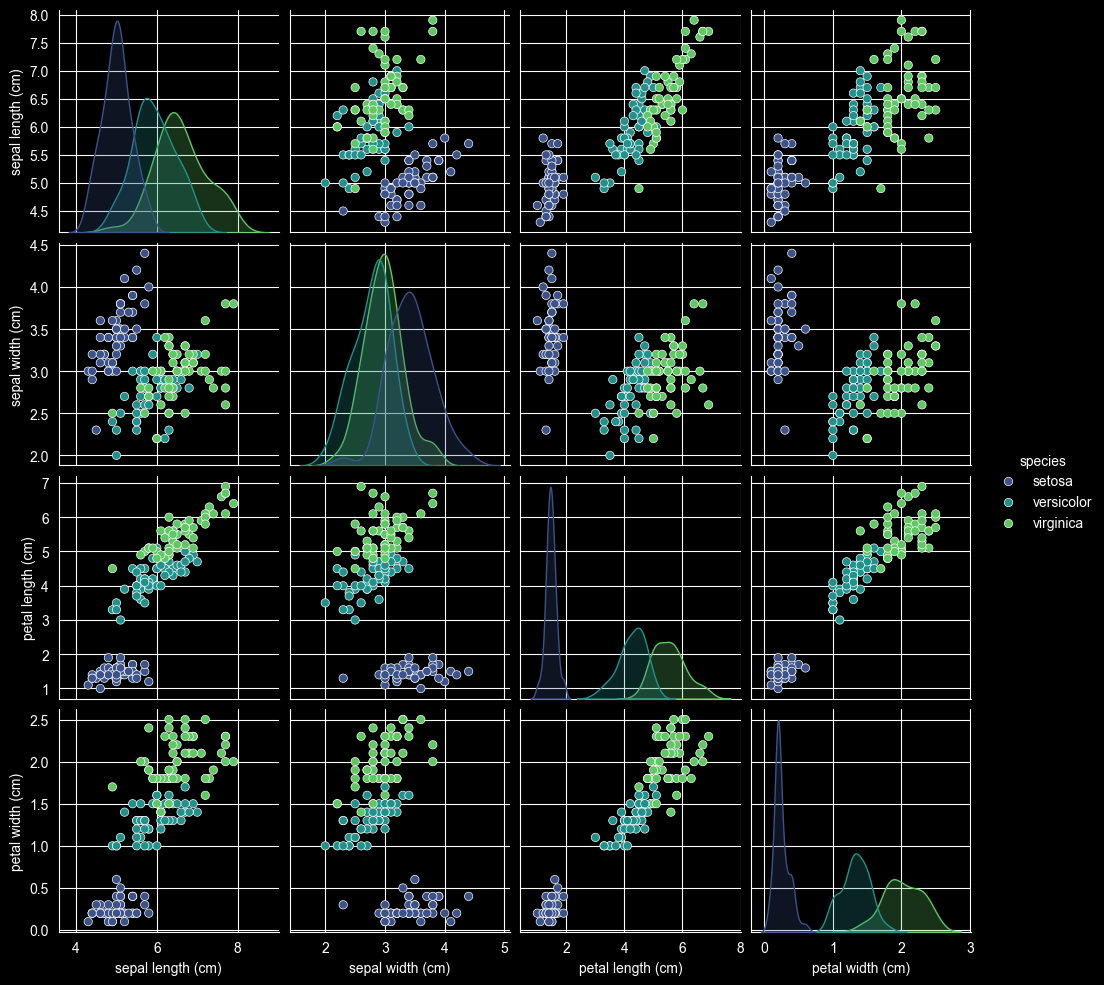

In [44]:
sns.pairplot(df, hue='species', palette='viridis') # Visualize relationships / Визуализация взаимосвязей
plt.show()

### Q6 (10 marks)
**Question:** Based on your plot, which two features appear most useful to separate the classes? Explain in one short sentence.

**Answer:**
**Petal length** and **petal width** appear most useful because the species form very distinct, non-overlapping clusters when plotted against these two features.

## Part 3: Train-Test Split and KNN Modeling (30 marks)

### Q7 (10 marks)
Split the data into training (75%) and testing (25%) sets. Use `stratify=target` and `random_state=42`. Print the shapes of the resulting sets.

<llm-snippet-file>/Users/namazbekbekzhanov/AntigravityProjects/KBTU_ML/KBTU_ML_Assignments/Assignment_3/Iris_Classification.ipynb</llm-snippet-file>


<llm-snippet-file>/Users/namazbekbekzhanov/AntigravityProjects/KBTU_ML/KBTU_ML_Assignments/Assignment_3/Iris_Classification.ipynb</llm-snippet-file>


In [45]:
from sklearn.model_selection import train_test_split  # Split into train and test / Разделить на обучение и тест

# Split the data / Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Detailed outputs to understand the division / Подробный вывод для понимания разделения
print("--- Dataset Division Details ---")
print(f"Total samples in X: {X.shape[0]}")
print(f"Training samples (X_train): {X_train.shape[0]} (75%)")
print(f"Testing samples (X_test):   {X_test.shape[0]} (25%)")

print("\n--- Feature/Target Alignment ---")
print(f"X_train (Features) shape: {X_train.shape} matches y_train (Labels) length: {len(y_train)}")
print(f"X_test  (Features) shape: {X_test.shape}  matches y_test  (Labels) length: {len(y_test)}")

print("\n--- Stratification Check (Class distribution) ---")
# Using np.unique to count occurrences of each class / Использование np.unique для подсчета вхождений каждого класса
train_values, train_counts = np.unique(y_train, return_counts=True)
test_values, test_counts = np.unique(y_test, return_counts=True)

print(f"Labels in y_train: {dict(zip(train_values, train_counts))}")
print(f"Labels in y_test:  {dict(zip(test_values, test_counts))}")

--- Dataset Division Details ---
Total samples in X: 150
Training samples (X_train): 112 (75%)
Testing samples (X_test):   38 (25%)

--- Feature/Target Alignment ---
X_train (Features) shape: (112, 4) matches y_train (Labels) length: 112
X_test  (Features) shape: (38, 4)  matches y_test  (Labels) length: 38

--- Stratification Check (Class distribution) ---
Labels in y_train: {np.int64(0): np.int64(38), np.int64(1): np.int64(37), np.int64(2): np.int64(37)}
Labels in y_test:  {np.int64(0): np.int64(12), np.int64(1): np.int64(13), np.int64(2): np.int64(13)}


### Q8 (10 marks)
Train a `KNeighborsClassifier` with `n_neighbors=3`. Fit it on the training data and report the test accuracy.

In [46]:
from sklearn.neighbors import KNeighborsClassifier # Initialize KNN classifier / Инициализация классификатора KNN
from sklearn.metrics import accuracy_score # Calculate accuracy / Вычислить точность

knn = KNeighborsClassifier(n_neighbors=3) # Initialize KNN classifier / Инициализация классификатора KNN
knn.fit(X_train, y_train) # Train the model / Обучить модель

y_pred = knn.predict(X_test) # Make predictions / Сделать предсказания
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy / Вычислить точность
print(f"Test Accuracy (k=3): {accuracy:.4f}")

Test Accuracy (k=3): 0.9737


### Q9 (10 marks)
Compare the accuracy for `n_neighbors` = 1, 3, and 5. Which value gives the best accuracy and why?

In [47]:
for k in [1, 3, 5]:
    knn_k = KNeighborsClassifier(n_neighbors=k) # Initialize KNN classifier / Инициализация классификатора KNN
    knn_k.fit(X_train, y_train)
    acc = knn_k.score(X_test, y_test)
    print(f"Accuracy for k={k}: {acc:.4f}")

Accuracy for k=1: 0.9474
Accuracy for k=3: 0.9737
Accuracy for k=5: 0.9737


**Answer:**
In this specific split, all values might give very high accuracy (often 1.0 or close to it) because the Iris dataset is relatively simple and well-separated. However, generally, **k=3 or k=5** is preferred over k=1 to avoid overfitting and be more robust to noise.

## Part 4: Prediction (10 marks)

### Q10 (10 marks)
Use your trained classifier (with `k=3`) to predict the class of a new sample with features `[5.0, 2.9, 1.0, 0.2]`. Display the predicted class name.

In [48]:
new_sample = [[5.0, 2.9, 1.0, 0.2]] # New flower data / Данные нового цветка
prediction_idx = knn.predict(new_sample)[0] # Make predictions / Сделать предсказания
predicted_species = iris.target_names[prediction_idx]

print(f"Predicted Class: {predicted_species} 🌸")

Predicted Class: setosa 🌸
